In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Utils

In [0]:
import keras, math
import numpy as np
import keras.backend as K
import matplotlib.pyplot as plt
from pathlib import Path

def reset_weights(model):
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'): layer.kernel.initializer.run(session=session)
        if hasattr(layer, 'bias'):
            if layer.bias and hasattr(layer, 'bias_initializer'): layer.bias.initializer.run(session=session)


Using TensorFlow backend.


#Importamos la data y la procesamos

In [0]:
import pandas as pd
ratings = pd.read_csv("/content/drive/My Drive/ML/myanimelist/animelists_reduced.csv")
ratings_1= ratings.copy()

In [0]:
users= pd.read_csv("/content/drive/My Drive/ML/myanimelist/users_reduced.csv")
users_1=users.copy()

In [0]:
animes= pd.read_csv("/content/drive/My Drive/ML/myanimelist/animes_reduced.csv")
animes_1=animes.copy()

In [0]:
# Nos quedamos solo con su username y id
users_1.drop(columns = ['user_watching','user_completed','user_onhold','user_dropped','user_plantowatch','user_days_spent_watching','gender','location',
                      'birth_date','access_rank','join_date','last_online','stats_mean_score','stats_rewatched','stats_episodes'], inplace = True)
users_1.head()  

,username,user_id
0,karthiga,2255153
1,Damonashu,37326
2,bskai,228342
3,terune_uzumaki,327311
4,Bas_G,5015094


In [0]:
#Nos quedamos con los atributos que nos interesan de cada Data Frame
ratings_1.drop(columns=['my_watched_episodes', 'my_start_date', 'my_finish_date', 'my_status', 'my_rewatching', 'my_rewatching_ep', 'my_last_updated', 'my_tags'], inplace = True)
ratings_1.head()

,username,anime_id,my_score
0,karthiga,21,9
1,karthiga,59,7
2,karthiga,74,7
3,karthiga,120,7
4,karthiga,178,7


In [0]:
# Nos quedamos con los siguiente atributos en anime
# anime_id	title	type	source	episodes	score	scored_by genre
print(len(animes_1))
animes_1 = animes_1.drop(columns = ['title_english', 'title_japanese', 'title_synonyms', 'image_url', 'status', 'airing', 'aired_string', 'aired', 'duration', 'rating', 'rank','popularity', 'members']) 
animes_1 = animes_1.drop(columns = ['favorites', 'background', 'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio', 'opening_theme', 'ending_theme', 'duration_min', 'aired_from_year'])

#animes.head()


5768


In [0]:
# Filtramos los animes que solo son de TV
anime_tv = animes_1[animes_1['type']=='TV']
anime_tv.head()

,anime_id,title,type,source,episodes,score,scored_by,genre
0,11013,Inu x Boku SS,TV,Manga,12,7.63,139250,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,TV,Manga,26,7.89,91206,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,TV,Manga,51,7.55,37129,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,TV,Original,38,8.21,36501,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,TV,Manga,25,8.67,107767,"Comedy, Drama, Romance, Shounen"


In [0]:
# Solo cambiamos el nombre de la columna my_score por comodidad
ratings_1.rename(columns= {'my_score' : 'score'}, inplace = True)
ratings_1.head()

,username,anime_id,score
0,karthiga,21,9
1,karthiga,59,7
2,karthiga,74,7
3,karthiga,120,7
4,karthiga,178,7


In [0]:
# Unimos los dos Data Frames
merged = ratings_1.merge(anime_tv, left_on = 'anime_id', right_on = 'anime_id', suffixes= ['_user', ''])
merged.head()

,username,anime_id,score_user,title,type,source,episodes,score,scored_by,genre
0,karthiga,21,9,One Piece,TV,Manga,0,8.54,423868,"Action, Adventure, Comedy, Super Power, Drama,..."
1,Damonashu,21,10,One Piece,TV,Manga,0,8.54,423868,"Action, Adventure, Comedy, Super Power, Drama,..."
2,bskai,21,8,One Piece,TV,Manga,0,8.54,423868,"Action, Adventure, Comedy, Super Power, Drama,..."
3,Slimak,21,10,One Piece,TV,Manga,0,8.54,423868,"Action, Adventure, Comedy, Super Power, Drama,..."
4,MistButterfly,21,0,One Piece,TV,Manga,0,8.54,423868,"Action, Adventure, Comedy, Super Power, Drama,..."


In [0]:
# Nos quedamos con 4*10^4 usuarios para agilizar los calculos
merged = merged[['username', 'title', 'anime_id','score_user']]
merged = merged.merge(users_1, left_on = 'username', right_on = 'username')
merged.head()

,username,title,anime_id,score_user,user_id
0,karthiga,One Piece,21,9,2255153
1,karthiga,Chobits,59,7,2255153
2,karthiga,Gakuen Alice,74,7,2255153
3,karthiga,Fruits Basket,120,7,2255153
4,karthiga,Ultra Maniac,178,7,2255153


In [0]:

# Experimentalmente con 10^4 datos no da RTE
data = merged.copy()
data.head()

,username,title,anime_id,score_user,user_id
0,karthiga,One Piece,21,9,2255153
1,karthiga,Chobits,59,7,2255153
2,karthiga,Gakuen Alice,74,7,2255153
3,karthiga,Fruits Basket,120,7,2255153
4,karthiga,Ultra Maniac,178,7,2255153


In [0]:
data.shape

(111837, 5)

In [0]:
data = data[data.score_user != 0] #Los 0 indican que un anime no fue calificado, por lo que procedemos a eliminarlos
data.shape

(69329, 5)

In [0]:

keyMean = lambda x: (x.mean())
keyStd = lambda x: (x.std())
data['user_mean'] = data[['username','score_user']].groupby('username').transform(keyMean)
data['std'] = data[['username','score_user']].groupby('username').transform(keyStd)

key = lambda x: x.username

zscore = lambda x: (x - x.mean())
transformed = data[['username','score_user']].groupby('username').transform(zscore)


In [0]:
data.score_user= transformed

In [0]:
data=data.dropna()

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69325 entries, 0 to 111832
Data columns (total 7 columns):
username      69325 non-null object
title         69325 non-null object
anime_id      69325 non-null int64
score_user    69325 non-null float64
user_id       69325 non-null int64
user_mean     69325 non-null float64
std           69325 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 4.2+ MB


In [0]:
data.user_id = data.user_id.astype('category').cat.codes.values
data.anime_id = data.anime_id.astype('category').cat.codes.values

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [0]:
print("cantidad de usuarios en data: ",len(data.user_id.unique()))
print("cantidad de usuarios en train: ",len(train.user_id.unique()))
print("cantidad de usuarios en test: ",len(test.user_id.unique()))

print("cantidad de animes en data: ",len(data.anime_id.unique()))
print("cantidad de animes en train: ",len(train.anime_id.unique()))
print("cantidad de animes en test: ",len(test.anime_id.unique()))

cantidad de usuarios en data:  491
cantidad de usuarios en train:  490
cantidad de usuarios en test:  480
cantidad de animes en data:  2462
cantidad de animes en train:  2427
cantidad de animes en test:  1984


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras import Model
from keras.layers import Input, Flatten, Embedding, Dot, Dropout, Concatenate, Dense, BatchNormalization
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
n_users, n_animes = len(data.user_id.unique()),len(data.anime_id.unique())
print(n_animes)

2462


#Neural Network

In [0]:
n_latent_factors_user = 75
n_latent_factors_anime = 75

anime_input = Input(shape=[1],name='Item')
anime_embedding = Embedding(n_animes + 1, n_latent_factors_anime, name='Anime-Embedding')(anime_input)
anime_vec = Flatten(name='FlattenAnimes')(anime_embedding)
anime_vec = Dropout(0.2)(anime_vec)

user_input = Input(shape=[1],name='User')
user_vec = Flatten(name='FlattenUsers')(Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
user_vec = Dropout(0.2)(user_vec)


concat = Concatenate()([anime_vec, user_vec])
concat_dropout = Dropout(0.2)(concat)
dense = Dense(200,name='FullyConnected')(concat_dropout)
#normal1= BatchNormalization()(dense)
dropout_1 = Dropout(0.2,name='Dropout1')(dense)
dense_2 = Dense(100,name='FullyConnected-1')(dropout_1)
#normal2= BatchNormalization()(dense_2)
dropout_2 = Dropout(0.2,name='Dropout2')(dense_2)
dense_3 = Dense(50,name='FullyConnected-2')(dropout_2)
#normal3= BatchNormalization()(dense_3)
dropout_3 = Dropout(0.2,name='Dropout3')(dense_3)
dense_4 = Dense(20,name='FullyConnected-3',activation='tanh')(dropout_3)
#normal4= BatchNormalization()(dense_4)
#dropout_4 = Dropout(0.5,name='Dropout4')(dense_4)

result = Dense(1, activation='tanh',name='Activation')(dense_4)
adam = Adam(lr=0.001)
model = Model([anime_input,user_input], result)


In [0]:
#DESCOMENTAR ESTA LINEA SI SE QUIERE USAR PESOS GUARDADOS ANTERIORMENTE
#model.load_weights("weights.best.hdf5")
model.compile(optimizer=adam,loss= 'mean_absolute_error')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Anime-Embedding (Embedding)     (None, 1, 75)        184725      Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 75)        36900       User[0][0]                       
__________________________________________________________________________________________________
FlattenAni

In [0]:
from IPython.display import SVG

SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

ImportError: ignored

In [0]:
from keras.callbacks import ModelCheckpoint
filepath="weightsZ.best.hdf5"
checkpoint= ModelCheckpoint(filepath,monitor="val_loss",verbose=1,save_best_only=True, mode="min")



In [0]:
!pip3 install pydot
!pip3 install pydotplus
!pip3 install graphviz

    100% |████████████████████████████████| 286kB 12.7MB/s 
  Running setup.py bdist_wheel for pydotplus ... - done
  Stored in directory: /root/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [0]:
reset_weights(model)
history = model.fit([train.anime_id, train.user_id], train.score_user, epochs=20,callbacks=[checkpoint], verbose=1, validation_split=0.2)


Train on 44368 samples, validate on 11092 samples
Epoch 1/20
44368/44368 [==============================] - 14s 323us/step - loss: 1.0694 - val_loss: 1.0133

Epoch 00001: val_loss improved from inf to 1.01331, saving model to weightsZ.best.hdf5
Epoch 2/20
44368/44368 [==============================] - 13s 298us/step - loss: 1.0071 - val_loss: 1.0007

Epoch 00002: val_loss improved from 1.01331 to 1.00067, saving model to weightsZ.best.hdf5
Epoch 3/20
44368/44368 [==============================] - 13s 299us/step - loss: 0.9865 - val_loss: 0.9952

Epoch 00003: val_loss improved from 1.00067 to 0.99516, saving model to weightsZ.best.hdf5
Epoch 4/20
44368/44368 [==============================] - 13s 300us/step - loss: 0.9748 - val_loss: 0.9963

Epoch 00004: val_loss did not improve from 0.99516
Epoch 5/20
44368/44368 [==============================] - 13s 297us/step - loss: 0.9681 - val_loss: 0.9915

Epoch 00005: val_loss improved from 0.99516 to 0.99152, saving model to weightsZ.best.hdf5

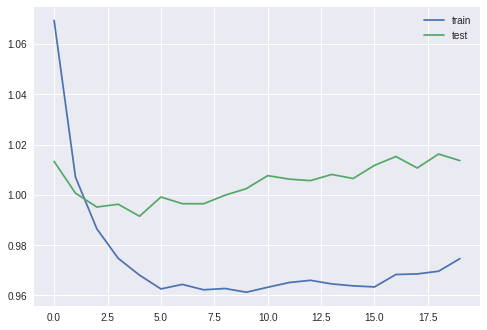

In [0]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [0]:

from sklearn.metrics import mean_absolute_error

y_true = test.score_user.values #+ test['user_mean'].values

y_pred = model.predict([test.anime_id, test.user_id])
#y_pred=np.reshape(y_pred,(y_pred.shape[0],))
#y_pred = y_pred + test['user_mean'].values

print(mean_absolute_error(y_true,y_pred))

1.0093826559490837


In [0]:
 def recommendByUser(user_id):
  dataUser= test[test.user_id==user_id]
  animesId= dataUser.anime_id.values
  animesName= dataUser.title.values
  score_predicted= model.predict([animesId,dataUser.user_id]) + dataUser['user_mean'].values
  scores=[]
  for i in range(len(score_predicted)):
    scores.append((animesName[i],np.round(score_predicted[i],2)[0]))
  scores=sorted(scores,key=itemgetter(1), reverse=True)

  return scores
  

In [0]:
animes=test[test.user_id==userId]
mean = animes['user_mean'].values[0]
mean

7.937956204379562

In [0]:
from operator import itemgetter
userId=5
scores= recommendByUser(userId)
for i in range(len(scores)):
  print("animeId y predScore: ", scores[i])
  animes=test[test.user_id==userId]
  mean = animes['user_mean'].values[0]
  score_real=np.round(animes[animes.title==scores[i][0]].score_user.values[0] +mean,2)
  print("score real:",score_real)
  print("")

animeId y predScore:  ('Steins;Gate', 9.51)
score real: 10.0

animeId y predScore:  ('Gintama&#039;: Enchousen', 9.31)
score real: 10.0

animeId y predScore:  ('Mushishi Zoku Shou', 9.27)
score real: 8.0

animeId y predScore:  ('Shinsekai yori', 9.16)
score real: 7.0

animeId y predScore:  ('Baccano!', 8.98)
score real: 8.0

animeId y predScore:  ('Nodame Cantabile Finale', 8.93)
score real: 9.0

animeId y predScore:  ('Natsume Yuujinchou Go', 8.93)
score real: 7.0

animeId y predScore:  ('One Punch Man', 8.9)
score real: 9.0

animeId y predScore:  ('Shingeki no Kyojin Season 2', 8.87)
score real: 8.0

animeId y predScore:  ('Shokugeki no Souma: Ni no Sara', 8.85)
score real: 8.0

animeId y predScore:  ('Drifters', 8.84)
score real: 9.0

animeId y predScore:  ('xxxHOLiC Kei', 8.82)
score real: 9.0

animeId y predScore:  ('Clannad', 8.78)
score real: 10.0

animeId y predScore:  ('Full Metal Panic? Fumoffu', 8.73)
score real: 10.0

animeId y predScore:  ('Tsukimonogatari', 8.71)
score re

#Neural Network with CosSim

In [0]:
animes_2=animes.copy()
users_2=users.copy()
ratings_2=ratings.copy()

In [0]:
#Esta es la segunda parte
animes_2['background'] = animes_2['background'].fillna('')
animes_2['description'] = animes_2['background'] + animes_2['related']
animes_2['description'] = animes_2['description'].fillna('')


In [0]:
data_2 = merged.copy()
data_2 = data_2[data_2.score_user != 0] #Los 0 indican que un anime no fue calificado, por lo que procedemos a eliminarlos
data_2.shape


(69329, 20)

In [0]:
animeList = list(data_2.anime_id.unique())

In [0]:
animes_2.shape

(5768, 34)

In [0]:
# Unimos los dos Data Frames
animes_2= animes_2[animes_2.anime_id.isin(animeList)]
animes_2.shape

(2462, 34)

In [0]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(animes_2['description'])
tfidf_matrix.shape


(2462, 70167)

In [0]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [0]:
cosine_sim.shape

(2462, 2462)

In [0]:
animes_2 = animes_2.reset_index()
titles = animes_2['title']
indices = pd.Series(animes_2.index, index=animes_2['title'])
indices


title
Inu x Boku SS                         0
Seto no Hanayome                      1
Shugo Chara!! Doki                    2
Princess Tutu                         3
Bakuman. 3rd Season                   4
Yume-iro Pâtissière                   5
Ultra Maniac                          6
Shakugan no Shana II (Second)         7
Nodame Cantabile: Paris-hen           8
Ouran Koukou Host Club                9
Junjou Romantica 2                   10
Kaichou wa Maid-sama!                11
Sekaiichi Hatsukoi 2                 12
Tonari no Kaibutsu-kun               13
Bleach                               14
Chobits                              15
Kimi ni Todoke                       16
Naruto: Shippuuden                   17
Ranma ½                              18
Toradora!                            19
Bakuman. 2nd Season                  20
Gakuen Alice                         21
Skip Beat!                           22
Chihayafuru 2                        23
Shounen Onmyouji                  

In [0]:
data['cos_sim'] = list(map(lambda x: cosine_sim[indices[x]],data['title']))
data

,username,title,anime_id,score_user,user_id,user_mean,std,cos_sim
0,karthiga,One Piece,10,1.566038,363,7.433962,1.232718,"[0.03692713387199087, 0.07814275014739049, 0.0..."
1,karthiga,Chobits,30,-0.433962,363,7.433962,1.232718,"[0.02523718198400693, 0.032287101715106056, 0...."
2,karthiga,Gakuen Alice,44,-0.433962,363,7.433962,1.232718,"[0.015912950277736114, 0.023296190599267616, 0..."
3,karthiga,Fruits Basket,79,-0.433962,363,7.433962,1.232718,"[0.01120468305012191, 0.0175814607041341, 0.01..."
4,karthiga,Ultra Maniac,126,-0.433962,363,7.433962,1.232718,"[0.017897824713572034, 0.043626409095707516, 0..."
5,karthiga,Ranma ½,146,-0.433962,363,7.433962,1.232718,"[0.02845686982193608, 0.07193963215708774, 0.0..."
6,karthiga,Cardcaptor Sakura,156,-1.433962,363,7.433962,1.232718,"[0.019259016047206125, 0.03856795971750463, 0...."
7,karthiga,Daa! Daa! Daa!,157,-1.433962,363,7.433962,1.232718,"[0.011853586464548578, 0.017353376007802644, 0..."
8,karthiga,InuYasha,172,0.566038,363,7.433962,1.232718,"[0.02670458133366859, 0.05525464813160432, 0.0..."
9,karthiga,Bleach,183,2.566038,363,7.433962,1.232718,"[0.024711477746001975, 0.04878880174271986, 0...."


In [0]:
np.reshape(data['cos_sim'].values,(69325,2462))
data['cos_sim'].shape

ValueError: ignored

In [0]:
n_latent_factors_user = 75
n_latent_factors_anime = 75

anime_input = Input(shape=[1],name='Item')
anime_embedding = Embedding(n_animes + 1, n_latent_factors_anime, name='Anime-Embedding')(anime_input)
anime_vec = Flatten(name='FlattenAnimes')(anime_embedding)
anime_vec = Dropout(0.2)(anime_vec)

user_input = Input(shape=[1],name='User')
user_vec = Flatten(name='FlattenUsers')(Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
user_vec = Dropout(0.2)(user_vec)

features_input = Input(shape=(2462,), name='Cosine_Sim')


concat = Concatenate()([anime_vec, user_vec,features_input])
concat_dropout = Dropout(0.2)(concat)
dense = Dense(200,name='FullyConnected')(concat_dropout)
#normal1= BatchNormalization()(dense)
dropout_1 = Dropout(0.2,name='Dropout1')(dense)
dense_2 = Dense(100,name='FullyConnected-1')(dropout_1)
#normal2= BatchNormalization()(dense_2)
dropout_2 = Dropout(0.2,name='Dropout2')(dense_2)
dense_3 = Dense(50,name='FullyConnected-2')(dropout_2)
#normal3= BatchNormalization()(dense_3)
dropout_3 = Dropout(0.2,name='Dropout3')(dense_3)
dense_4 = Dense(20,name='FullyConnected-3',activation='elu')(dropout_3)
#normal4= BatchNormalization()(dense_4)
#dropout_4 = Dropout(0.5,name='Dropout4')(dense_4)

result = Dense(1, activation='linear',name='Activation')(dense_4)
adam = Adam(lr=0.001)
model_2 = Model([anime_input,user_input,features_input], result)

In [0]:
#DESCOMENTAR ESTA LINEA SI SE QUIERE USAR PESOS GUARDADOS ANTERIORMENTE
#model.load_weights("weightsZ_2.best.hdf5")
model_2.compile(optimizer=adam,loss= 'mean_absolute_error')
model_2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Anime-Embedding (Embedding)     (None, 1, 75)        184725      Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 75)        36900       User[0][0]                       
__________________________________________________________________________________________________
FlattenAni

In [0]:
from keras.callbacks import ModelCheckpoint
filepath="weightsZ_2.best.hdf5"
checkpoint= ModelCheckpoint(filepath,monitor="val_loss",verbose=1,save_best_only=True, mode="min")


In [0]:
test.shape

(13865, 8)

In [0]:
reset_weights(model_2)
history = model_2.fit([train.anime_id, train.user_id,train.cos_sim], train.score_user, epochs=20,callbacks=[checkpoint], verbose=1, validation_split=0.2)


ValueError: ignored